Published on March 09, 2024. By Marília Prata, mpwolke

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geolifeclef-2024/GLC24_PA_metadata_train.csv
/kaggle/input/geolifeclef-2024/GLC24_P0_metadata_train.csv
/kaggle/input/geolifeclef-2024/GLC24_SAMPLE_SUBMISSION.csv
/kaggle/input/geolifeclef-2024/GLC24_PA_metadata_test.csv
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/50/1465047.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/61/2256147.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/61/1836147.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/05/1600547.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/05/2270547.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/60/536047.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb/47/27/1272747.jpeg
/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patch

In [2]:
!wget https://raw.githubusercontent.com/plantnet/GeoLifeCLEF/master/download.py

--2024-03-09 16:07:27--  https://raw.githubusercontent.com/plantnet/GeoLifeCLEF/master/download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12216 (12K) [text/plain]
Saving to: 'download.py'

download.py         100%[===================>]  11.93K  --.-KB/s    in 0.002s  

2024-03-09 16:07:28 (5.87 MB/s) - 'download.py' saved [12216/12216]



I ran the snippet above, though I still don't know how it works.

#Satellite time series

"Each observation is associated with the time series of the satellite median point values over each season since the winter of 1999 for six satellite bands (R, G, B, NIR, SWIR1, and SWIR2). This data carries a high-resolution local signature of the past 20 years' succession of seasonal vegetation changes, potential extreme natural events (fires), or land use changes."

"Format1: Six CSV files, one per band. The corresponds to the "surveyId," and the columns are the 84 seasons from winter 2000 until autumn 2020.

"Format2: . TimeSeries-Cubes - The above-mentioned CSV aggregated into 3d tensors with axes as BAND, QUARTER, and YEAR."

"Resolution: The original satellite data has a resolution of 30m per pixel
Source: Landsat remote sensing data pre-processed by the Ecodatacube platform
Access: /SatelliteTimeSeries/"

https://www.kaggle.com/competitions/geolifeclef-2024/data

In [3]:
!python download --help

python: can't open file '/kaggle/working/download': [Errno 2] No such file or directory


#Twenty years of Research 

"This data carries a high-resolution local signature of the past 20 years' succession of seasonal vegetation changes, potential extreme natural events (fires), or land use changes."

"Format1: Six CSV files, one per band. The corresponds to the "surveyId," and the columns are the 84 seasons from winter 2000 until autumn 2020."

We have 85 columns, I reduced that number since everything is huge on this project

In [6]:
train = pd.read_csv("../input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-swir1.csv", usecols=['surveyId', '2000_1', '2001_1', '2002_1', '2003_1', '2004_1', '2005_1', '2006_1', '2007_1', '2008_1', '2009_1', '2010_1', '2011_1', '2015_1', '2016_1', '2017_1', '2018_1', '2019_1', '2020_4'])

train.tail()

,surveyId,2000_1,2001_1,2002_1,2003_1,2004_1,2005_1,2006_1,2007_1,2008_1,2009_1,2010_1,2011_1,2015_1,2016_1,2017_1,2018_1,2019_1,2020_4
88982,3919553,55.0,55.0,55.0,55.0,62.0,68.0,68.0,68.0,68.0,66.0,66.0,65.0,68.0,65.0,64.0,52.0,NaN,NaN
88983,3919592,34.0,37.0,37.0,40.0,40.0,40.0,40.0,40.0,45.0,42.0,46.0,50.0,42.0,45.0,44.0,NaN,NaN,NaN
88984,3919620,71.0,60.0,60.0,71.0,48.0,59.0,59.0,59.0,59.0,59.0,59.0,64.0,64.0,64.0,64.0,61.0,NaN,NaN
88985,3919640,20.0,20.0,19.0,20.0,20.0,20.0,20.0,9.0,10.0,10.0,9.0,10.0,10.0,10.0,17.0,20.0,24.0,13.0
88986,3919655,23.0,23.0,23.0,23.0,25.0,27.0,27.0,27.0,27.0,27.0,27.0,42.0,57.0,56.0,56.0,50.0,NaN,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Correlation Matrix

With Few columns 'surveyId', '2000_1', '2001_1', '2002_1', '2003_1', '2004_1', '2005_1', '2006_1', '2007_1', '2008_1', '2009_1', '2010_1', '2011_1', '2015_1', '2016_1', '2017_1', '2018_1', '2019_1', '2020_4'

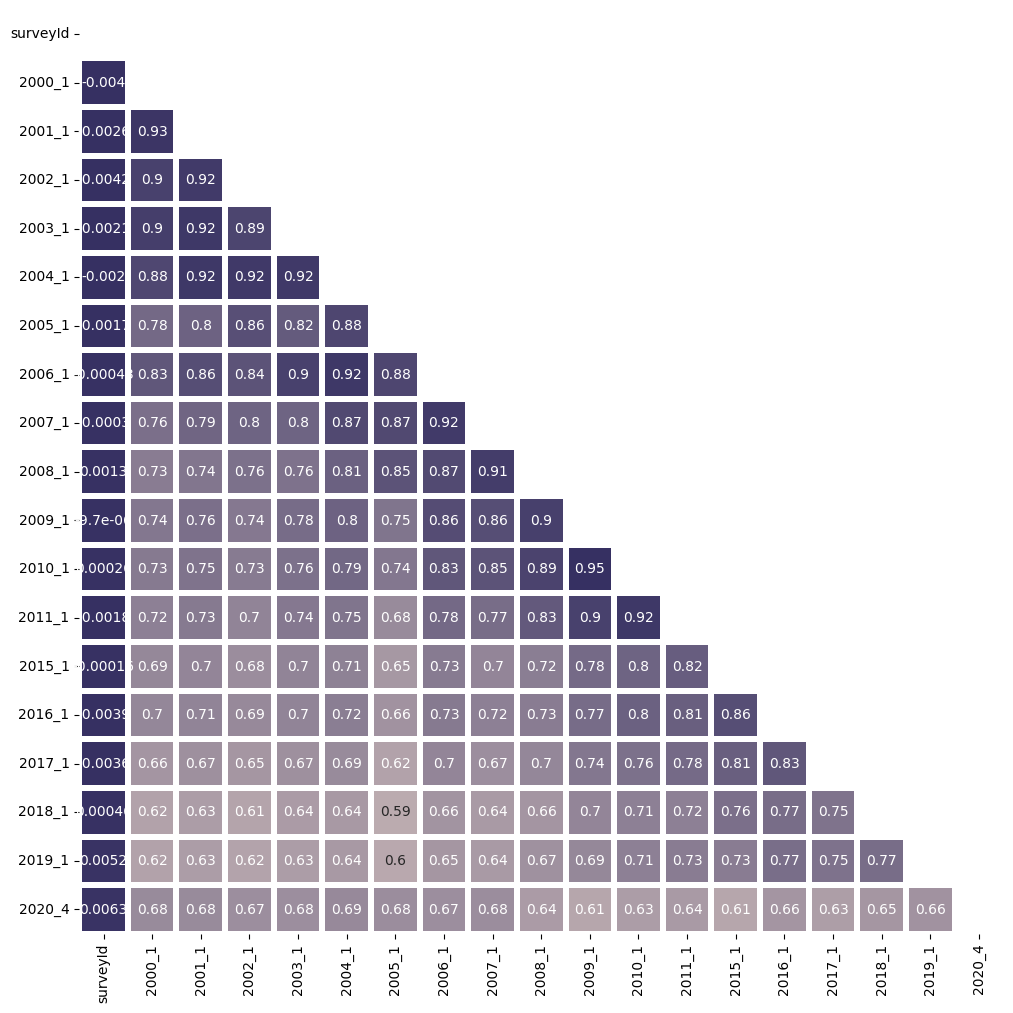

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors


#f4 = train[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']]


plt.subplots(figsize = (12, 12))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",
                                                           ['#363062',
                                                            '#E9D5CA',
                                                            '#363062',
                                                           ])

mask = np.triu(np.ones_like(train.corr() ))
sns.heatmap(train.corr(),
            mask = mask,
            cmap = cmap,
            cbar = False,
            square = True,
            annot = True,
            linewidths = 3,
           );

#Reducing even more the number of features (Seasons of the Swir1 Satellite band)

In [16]:
swir = pd.read_csv("../input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-swir1.csv", usecols=['surveyId', '2000_1',  '2010_3', '2020_4'], nrows= 1000)

swir.tail()

,surveyId,2000_1,2010_3,2020_4
995,43504,29.0,50.0,NaN
996,43512,32.0,50.0,NaN
997,43650,43.0,40.0,NaN
998,43687,55.0,45.0,NaN
999,43765,20.0,50.0,NaN


#Evolution 2000-2020

In [18]:
#Tawej https://www.kaggle.com/tawejssh/covid-19 Graph China/italy

#Let's visualise the evolution of results
evolution = swir.groupby('surveyId').sum()[['2000_1', '2010_3', '2020_4']]
#evolution['Expiration Rate'] = (evolution['Expired'] / evolution['Cumulative']) * 100
#evolution['Discharging Rate'] = (evolution['Discharged'] / evolution['Cumulative']) * 100
evolution.tail()

,2000_1,2010_3,2020_4
surveyId,,,
43504,29.0,50.0,0.0
43512,32.0,50.0,0.0
43650,43.0,40.0,0.0
43687,55.0,45.0,0.0
43765,20.0,50.0,0.0


Just checking to see if I reduced the entries

In [22]:
evolution["2020_4"].value_counts()

2020_4
0.0     892
47.0      6
59.0      6
34.0      6
60.0      5
43.0      4
37.0      4
52.0      4
69.0      4
50.0      4
48.0      3
42.0      3
36.0      3
57.0      3
38.0      3
55.0      3
31.0      3
16.0      2
28.0      2
51.0      2
45.0      2
17.0      2
24.0      2
32.0      2
49.0      2
14.0      2
56.0      2
18.0      1
46.0      1
27.0      1
44.0      1
39.0      1
61.0      1
30.0      1
54.0      1
58.0      1
65.0      1
23.0      1
80.0      1
9.0       1
29.0      1
25.0      1
22.0      1
83.0      1
53.0      1
63.0      1
75.0      1
8.0       1
71.0      1
40.0      1
35.0      1
Name: count, dtype: int64

#I intended to deliver something like that with ALL the Satellite Bands files:

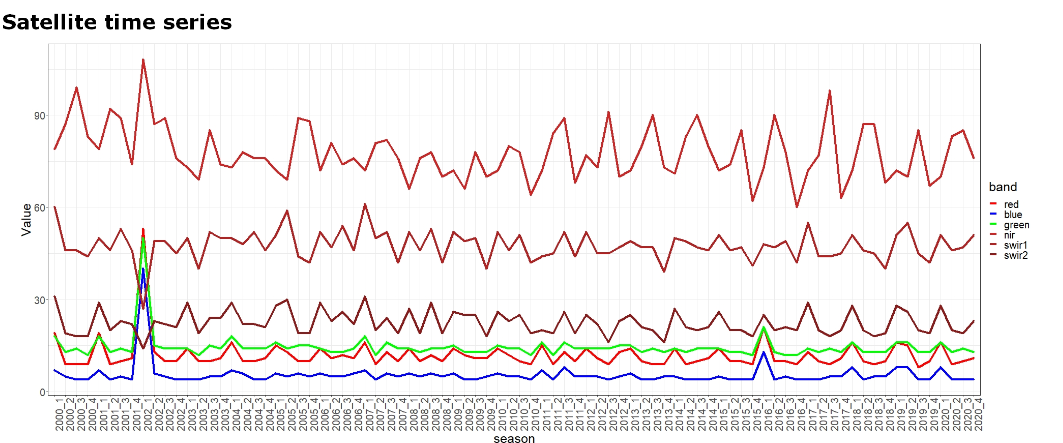

#Though I got that. Please, don't laugh : (

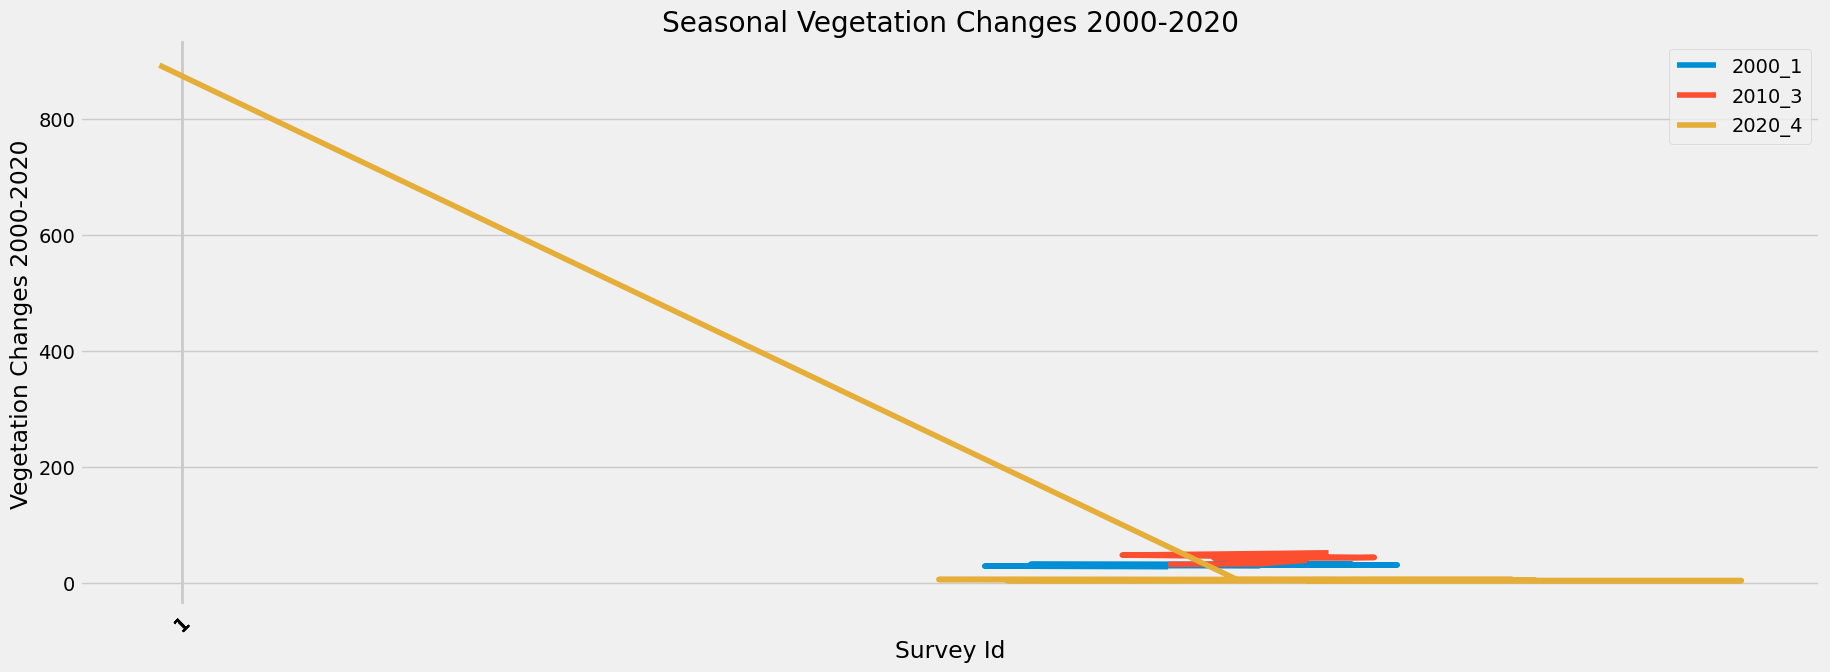

In [23]:
#By Tawej https://www.kaggle.com/tawejssh/covid-19 Graph China/italy

plt.figure(figsize=(20,7))
plt.plot(evolution['2000_1'].value_counts().head(), label='2000_1')
plt.plot(evolution['2010_3'].value_counts().head(), label='2010_3')
plt.plot(evolution['2020_4'].value_counts().head(), label='2020_4')
plt.legend()
#plt.grid()
plt.title('Seasonal Vegetation Changes 2000-2020')
plt.xticks(evolution.index.value_counts().head(),rotation=45)
plt.xlabel('Survey Id')
plt.ylabel('Vegetation Changes 2000-2020')
plt.show()

#Not reducing the Index (surveyId). It seems my vegetation suffered "potential extreme natural events (e. g.fires)"

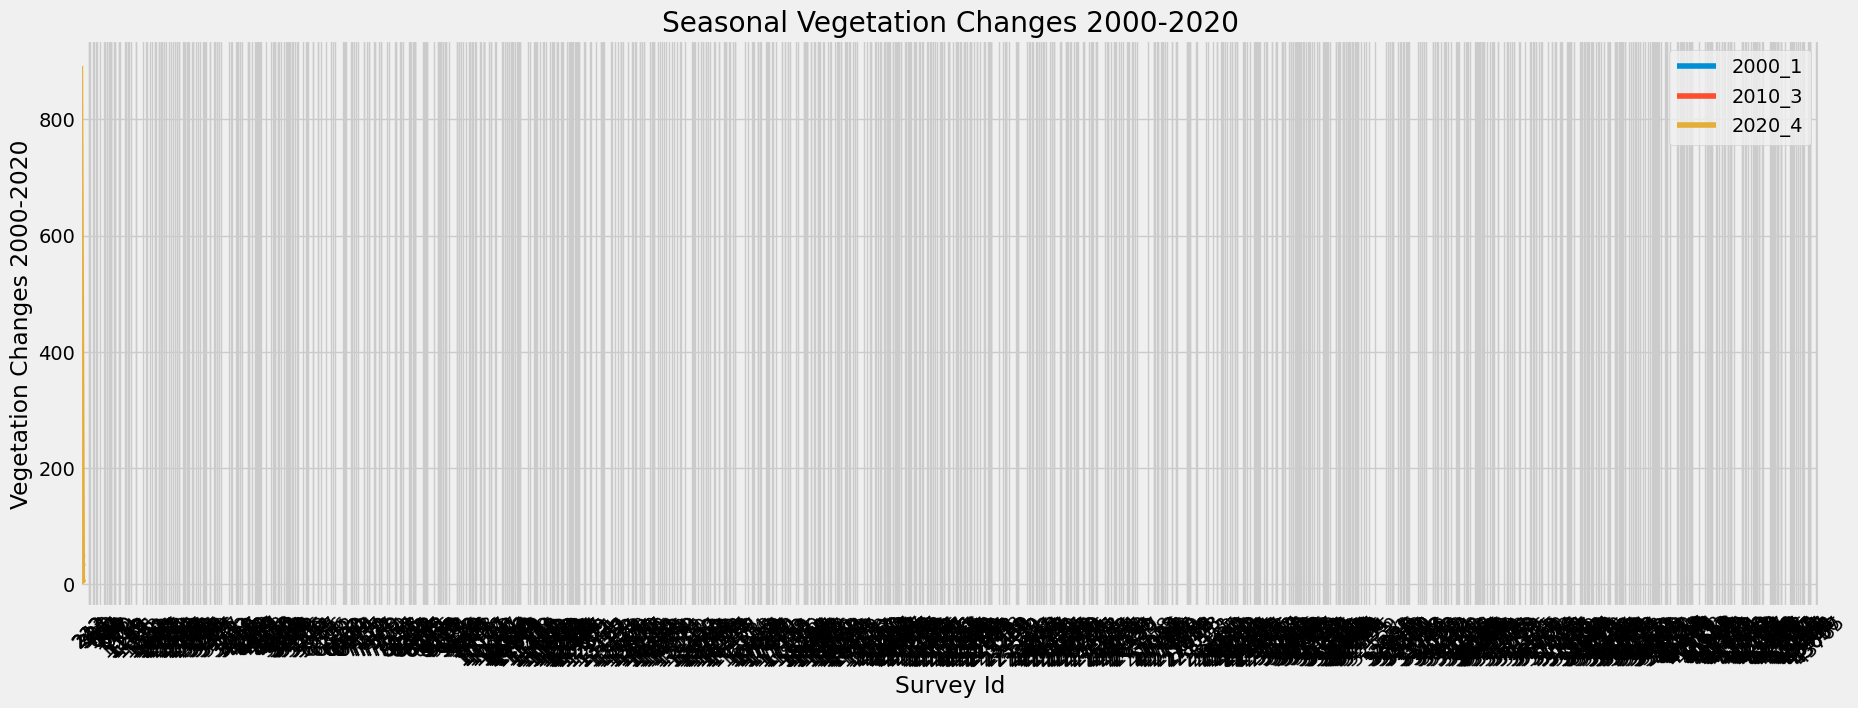

In [25]:
#By Tawej https://www.kaggle.com/tawejssh/covid-19 Graph China/italy

plt.figure(figsize=(20,7))
plt.plot(evolution['2000_1'].value_counts().head(), label='2000_1')
plt.plot(evolution['2010_3'].value_counts().head(), label='2010_3')
plt.plot(evolution['2020_4'].value_counts().head(), label='2020_4')
plt.legend()
#plt.grid()
plt.title('Seasonal Vegetation Changes 2000-2020')
plt.xticks(evolution.index,rotation=45)
plt.xlabel('Survey Id')
plt.ylabel('Vegetation Changes 2000-2020')
plt.show()

#Another irrelevant approach applying head only to the index.

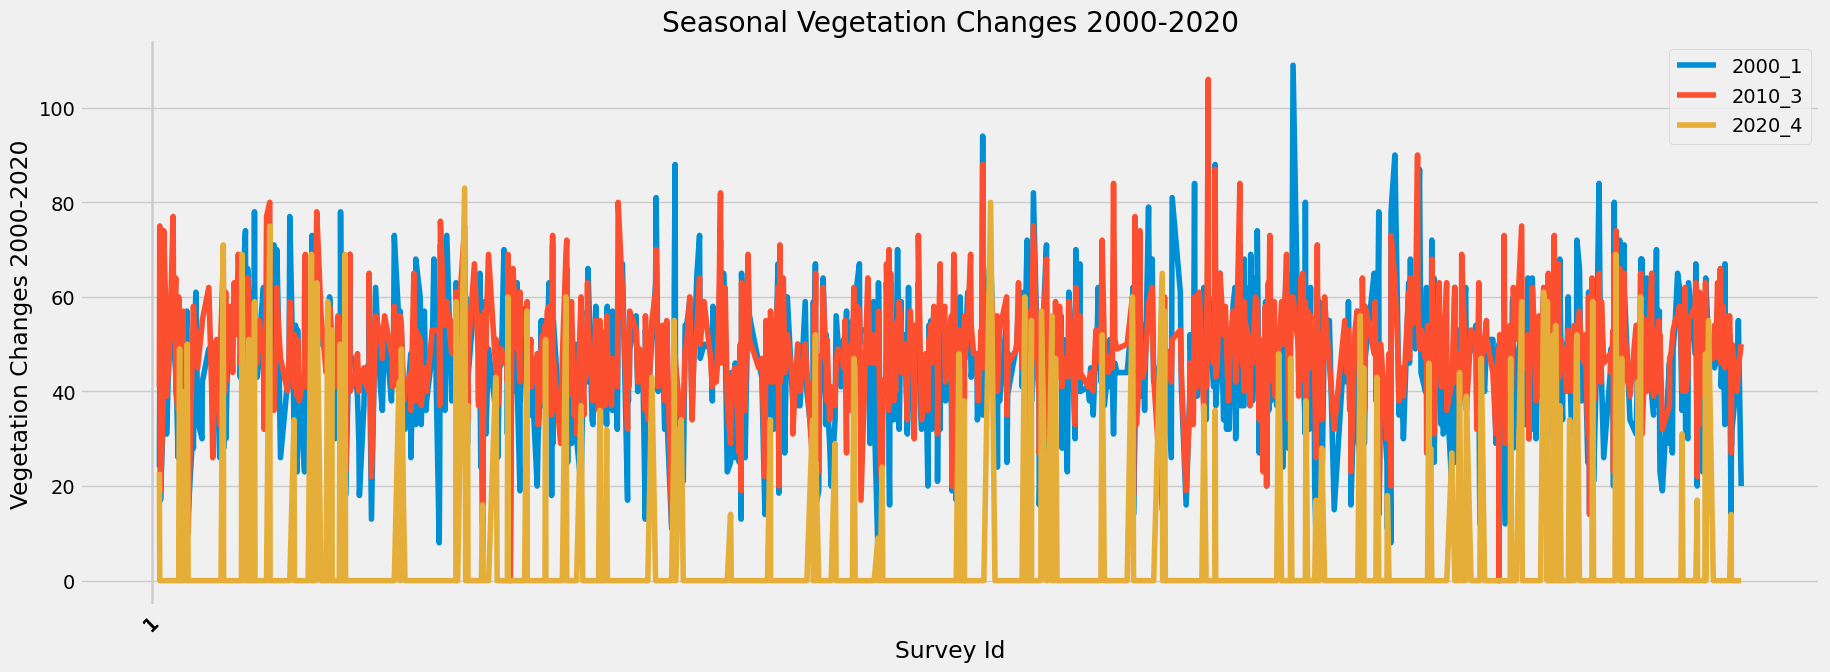

In [26]:
#By Tawej https://www.kaggle.com/tawejssh/covid-19 Graph China/italy

plt.figure(figsize=(20,7))
plt.plot(evolution['2000_1'], label='2000_1')
plt.plot(evolution['2010_3'], label='2010_3')
plt.plot(evolution['2020_4'], label='2020_4')
plt.legend()
#plt.grid()
plt.title('Seasonal Vegetation Changes 2000-2020')
plt.xticks(evolution.index.value_counts().head(5),rotation=45)
plt.xlabel('Survey Id')
plt.ylabel('Vegetation Changes 2000-2020')
plt.show()

#Satellite band Swir1 on Winter 2000

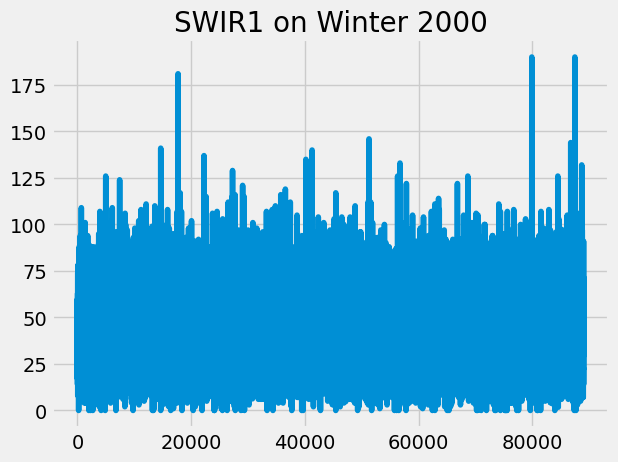

In [13]:
# Could be any column: No, only numeric data.
evolution['2000_1'].plot()
plt.title('SWIR1 on Winter 2000', fontsize=20);

#Satellite Band Swir1 on Winter 2010

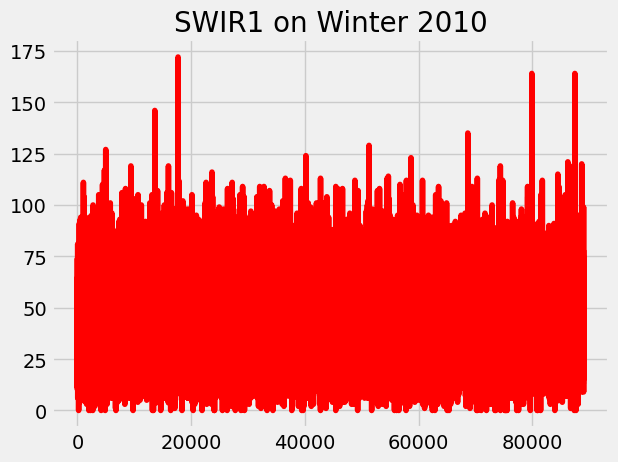

In [14]:
# Could be any column: No, only numeric data.
evolution['2010_1'].plot(color='r')
plt.title('SWIR1 on Winter 2010', fontsize=20);

#Satellite band Swir1 on Autumm 2020

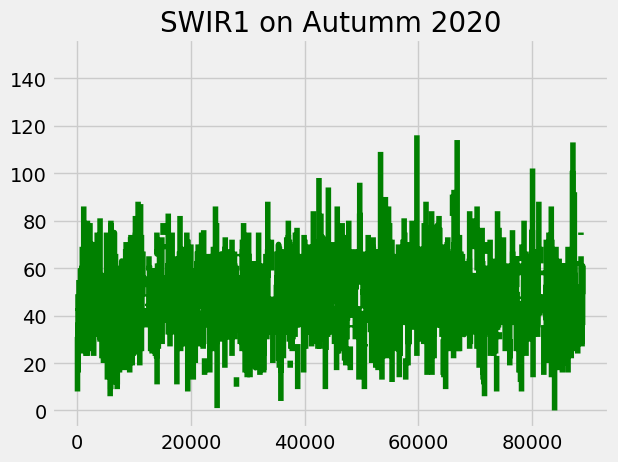

In [15]:
# Could be any column: No, only numeric data.
evolution['2020_4'].plot(color='g')
plt.title('SWIR1 on Autumm 2020', fontsize=20);

In [8]:
!pip install fasteda -q

In [9]:
from fasteda import fast_eda

DataFrame Head:


,surveyId,2000_1,2001_1,2002_1,2003_1,2004_1,2005_1,2006_1,2007_1,2008_1,2009_1,2010_1,2011_1,2015_1,2016_1,2017_1,2018_1,2019_1,2020_4
0,212,24.0,30.0,28.0,33.0,31.0,28.0,27.0,28.0,28.0,27.0,30.0,26.0,23.0,27.0,32.0,16.0,20.0,23.0
1,222,42.0,42.0,42.0,42.0,42.0,42.0,42.0,43.0,43.0,43.0,43.0,43.0,53.0,53.0,53.0,NaN,NaN,NaN
2,243,17.0,17.0,16.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,19.0,1.0,19.0,NaN


DataFrame Tail:


,surveyId,2000_1,2001_1,2002_1,2003_1,2004_1,2005_1,2006_1,2007_1,2008_1,2009_1,2010_1,2011_1,2015_1,2016_1,2017_1,2018_1,2019_1,2020_4
88984,3919620,71.0,60.0,60.0,71.0,48.0,59.0,59.0,59.0,59.0,59.0,59.0,64.0,64.0,64.0,64.0,61.0,NaN,NaN
88985,3919640,20.0,20.0,19.0,20.0,20.0,20.0,20.0,9.0,10.0,10.0,9.0,10.0,10.0,10.0,17.0,20.0,24.0,13.0
88986,3919655,23.0,23.0,23.0,23.0,25.0,27.0,27.0,27.0,27.0,27.0,27.0,42.0,57.0,56.0,56.0,50.0,NaN,NaN


----------------------------------------------------------------------------------------------------
Missing values:


,0
2000_1,22
2001_1,22
2002_1,22
2003_1,22
2004_1,22
2005_1,22
2006_1,22
2007_1,22
2008_1,22
2009_1,22


----------------------------------------------------------------------------------------------------
MSNO Matrix:



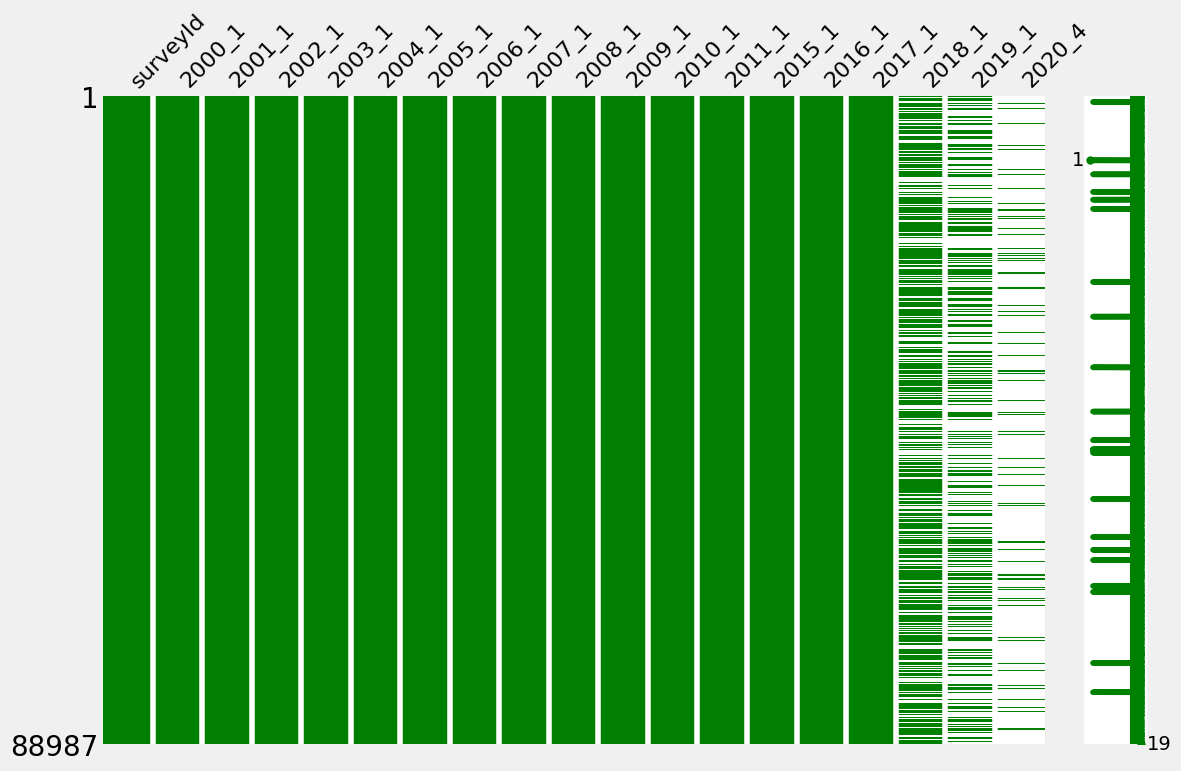

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(88987, 19)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88987 entries, 0 to 88986
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   surveyId  88987 non-null  int64  
 1   2000_1    88965 non-null  float64
 2   2001_1    88965 non-null  float64
 3   2002_1    88965 non-null  float64
 4   2003_1    88965 non-null  float64
 5   2004_1    88965 non-null  float64
 6   2005_1    88965 non-null  float64
 7   2006_1    88965 non-null  float64
 8   2007_1    88965 non-null  float64
 9   2008_1    88965 non-null  float64
 10  2009_1    88965 non-null  float64
 11  2010_1    88965 non-null  float64
 12  2011_1    88965 non-null  float64
 13  2015_1    88965 non-null  float64
 14  2016_1   

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
surveyId,88987,1963014.29,1961189,1134917.622,212,974945.5,1961189,2951540,3919655,0.002682,-1.192617
2000_1,88965,45.745,46,14.205,0,37,46,55,190,0.055156,0.172090
2001_1,88965,46,46,14.339,0,37,46,55,190,0.014031,0.115204
2002_1,88965,45.277,45,14.425,0,36,45,54,190,-0.000318,0.026459
2003_1,88965,45.391,46,14.937,0,35,46,55,190,0.036992,-0.115767
2004_1,88965,46.096,46,14.294,0,37,46,55,190,-0.024243,0.159028
2005_1,88965,44.437,45,15.167,0,34,45,54,190,-0.018198,0.006540
2006_1,88965,45.745,46,14.662,0,36,46,55,177,0.023913,0.137554
2007_1,88965,46.484,47,14.632,0,37,47,56,172,-0.095120,0.131826
2008_1,88965,45.581,46,15.284,0,36,46,56,172,-0.054483,-0.008793


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



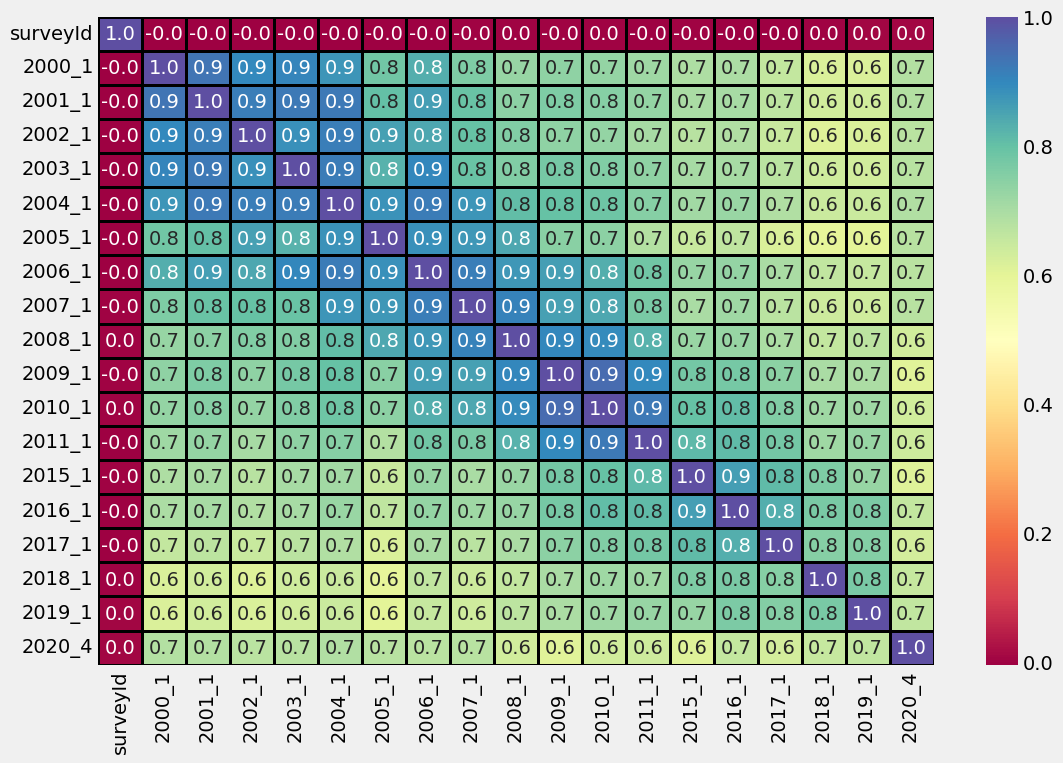

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



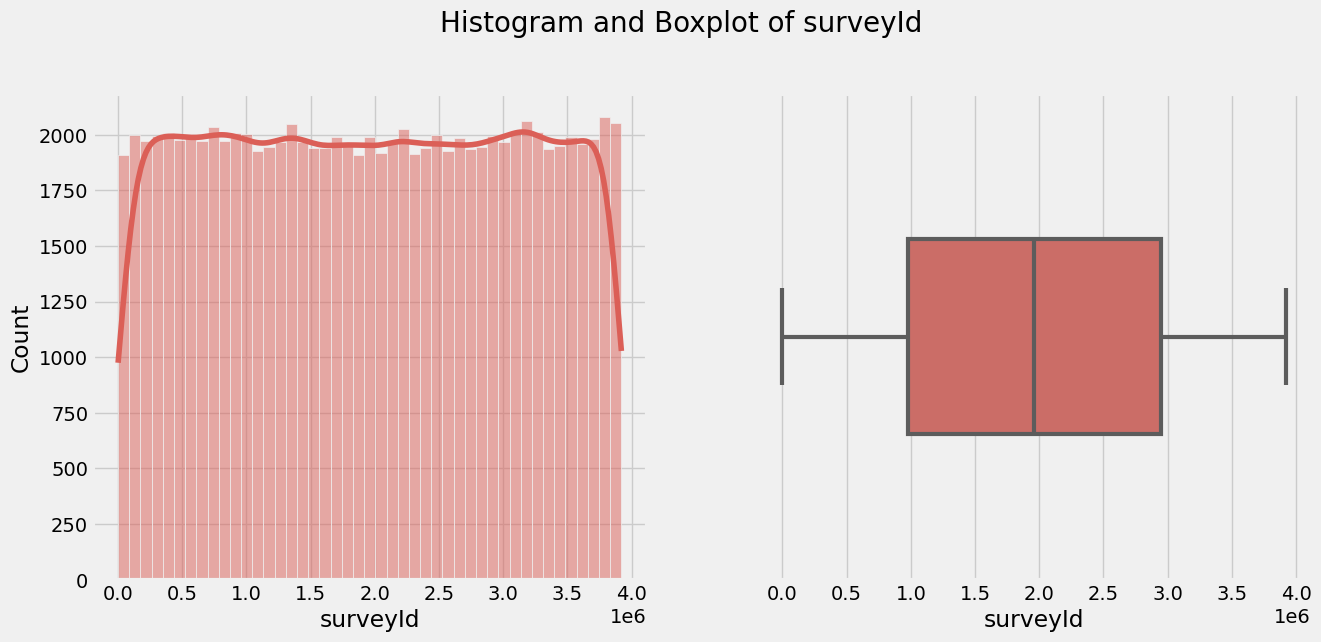

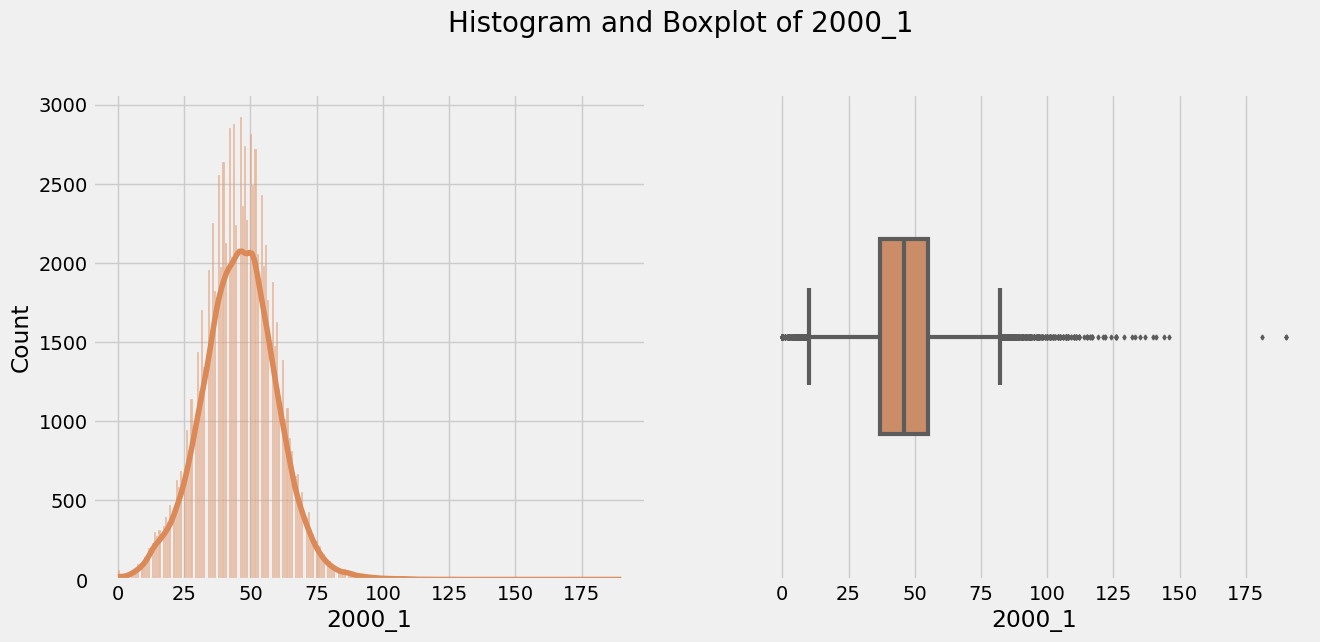

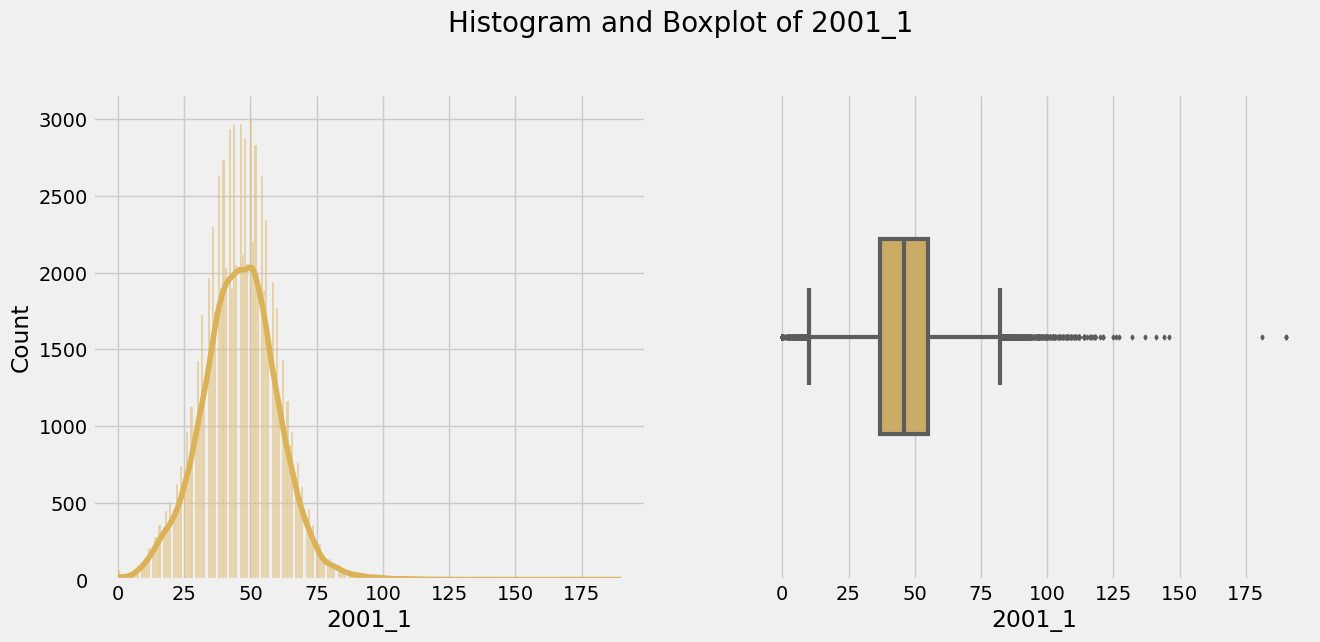

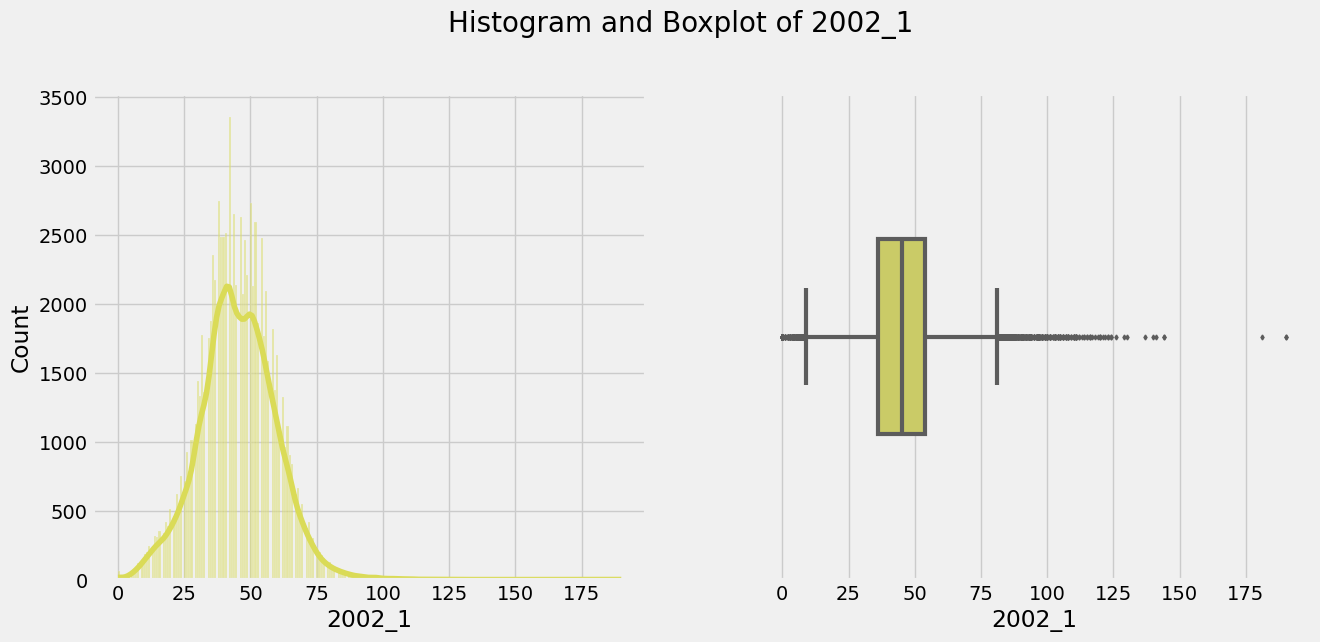

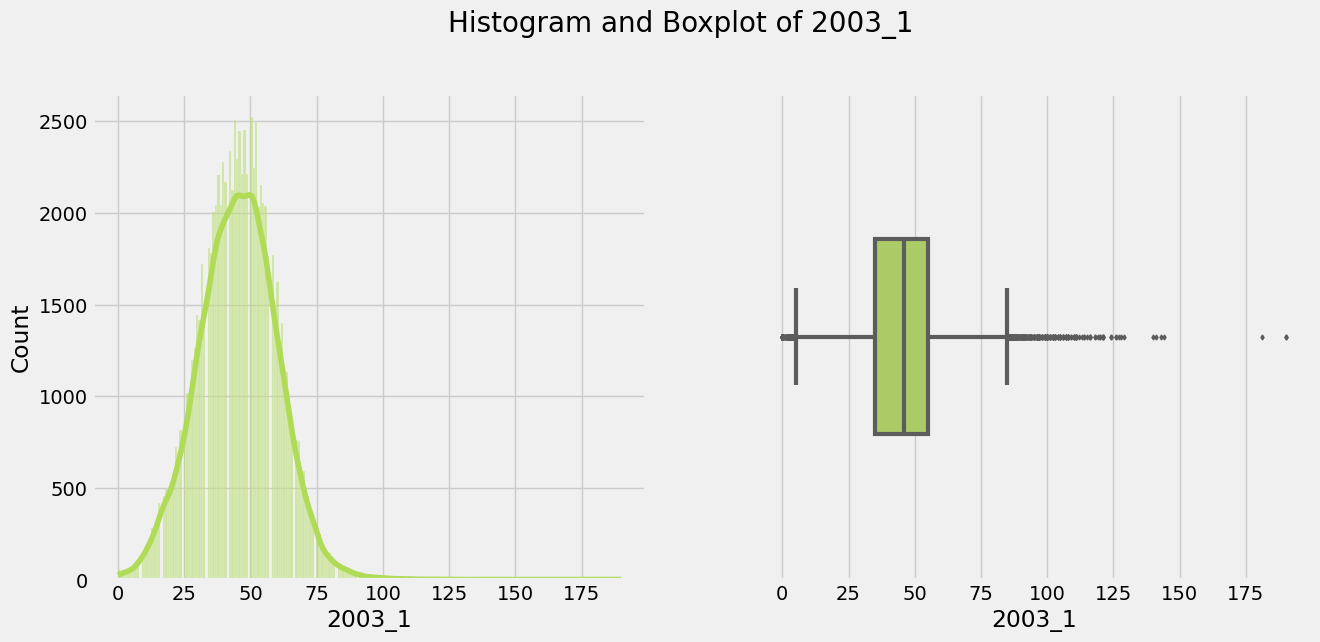

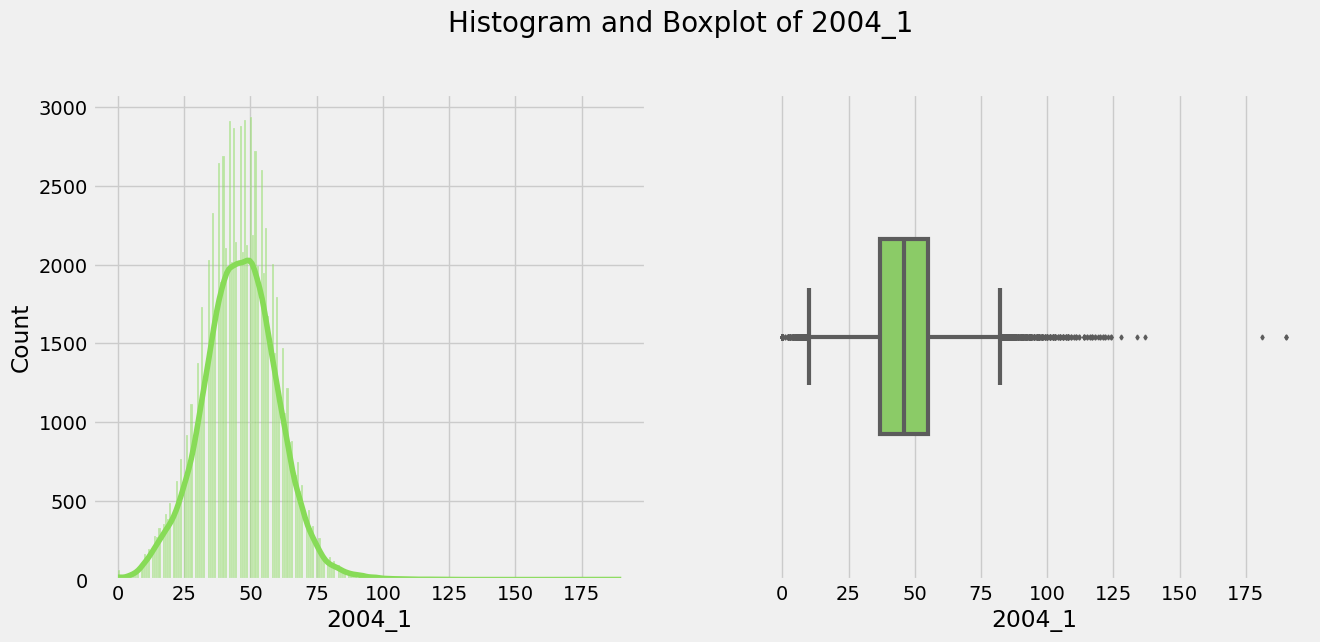

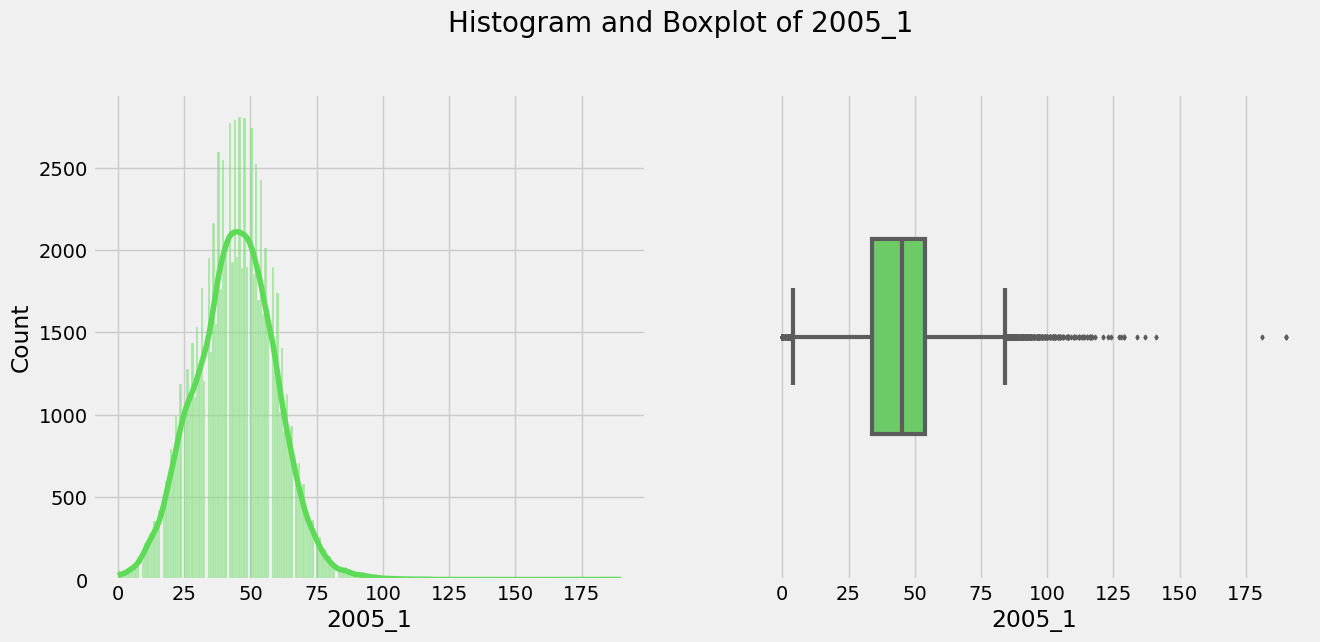

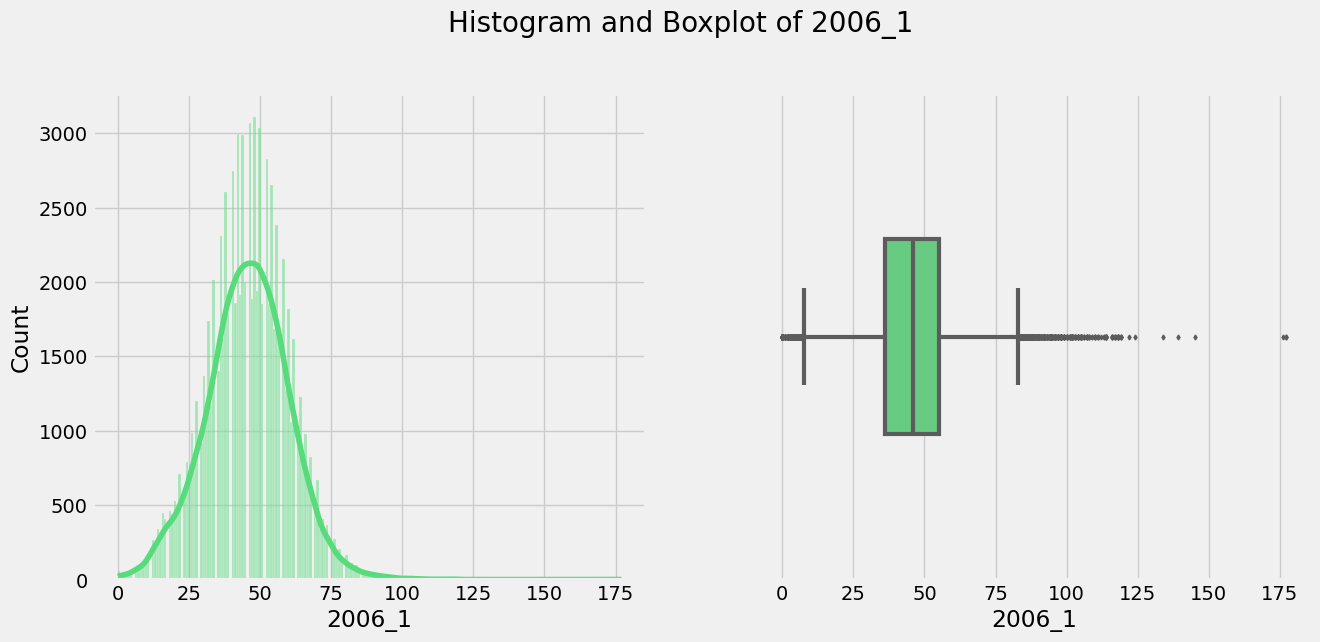

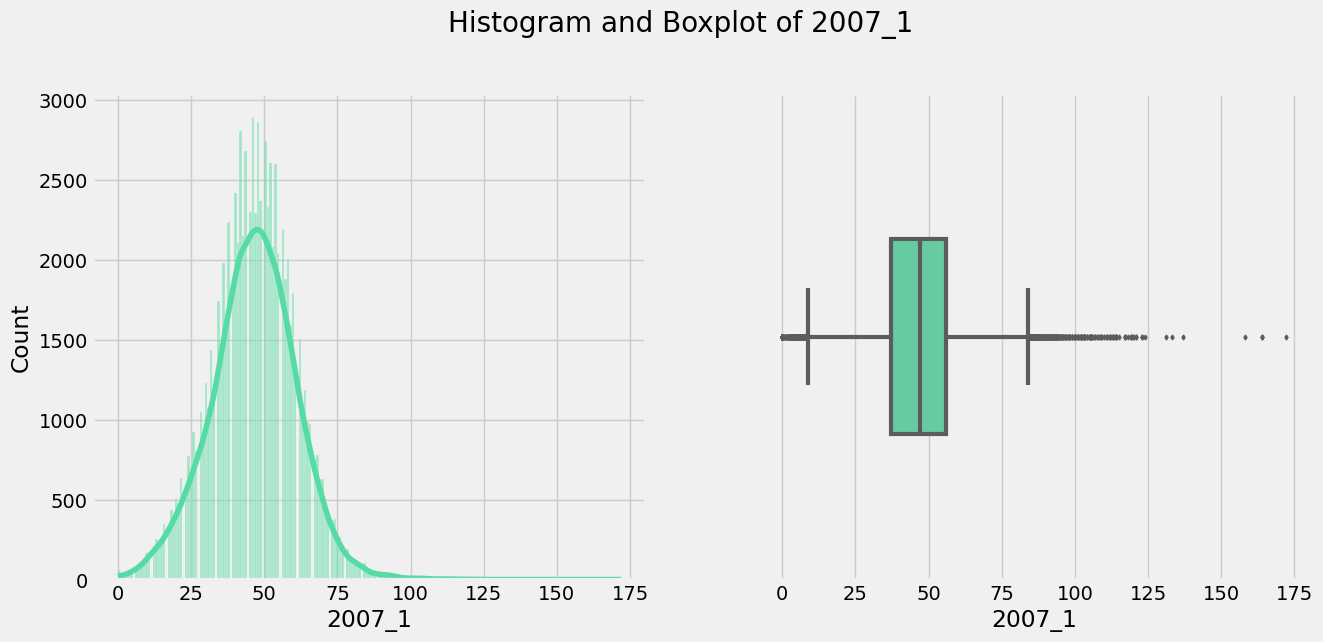

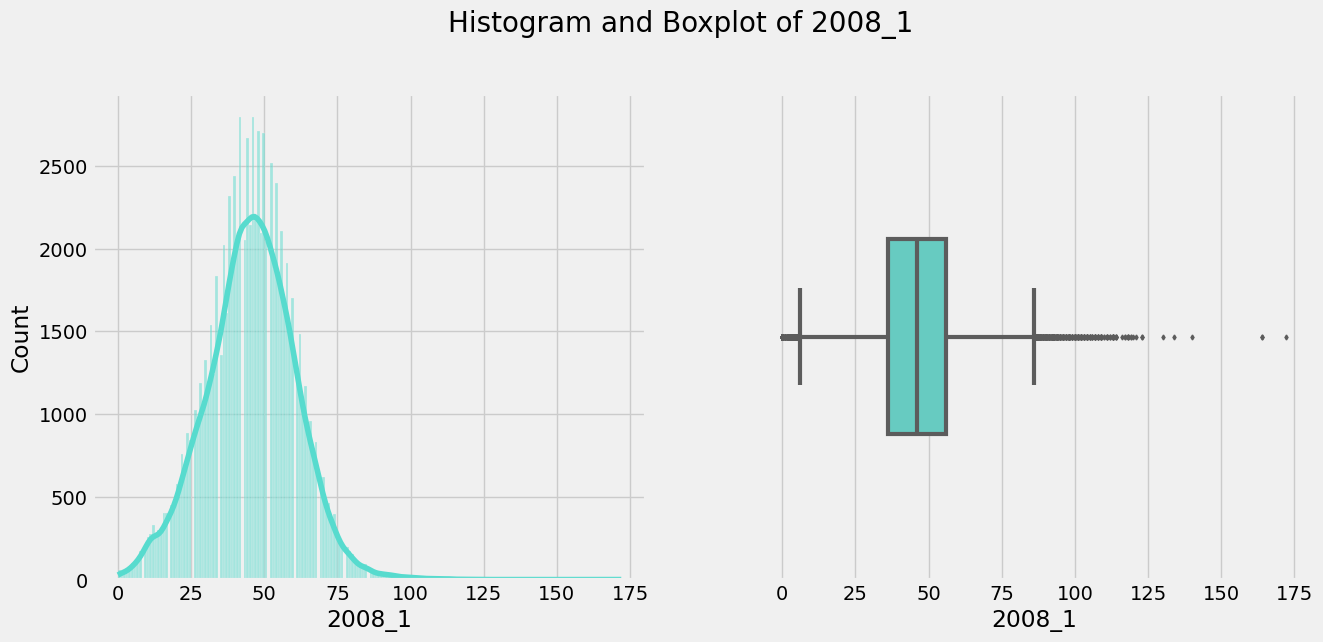

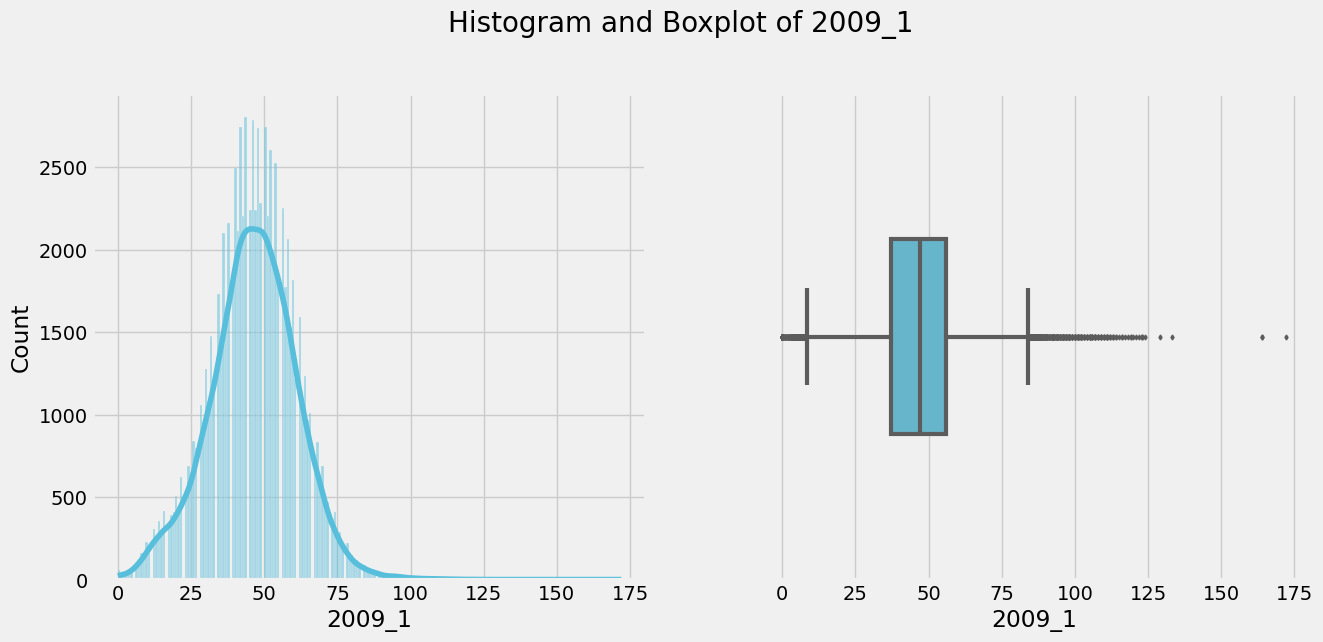

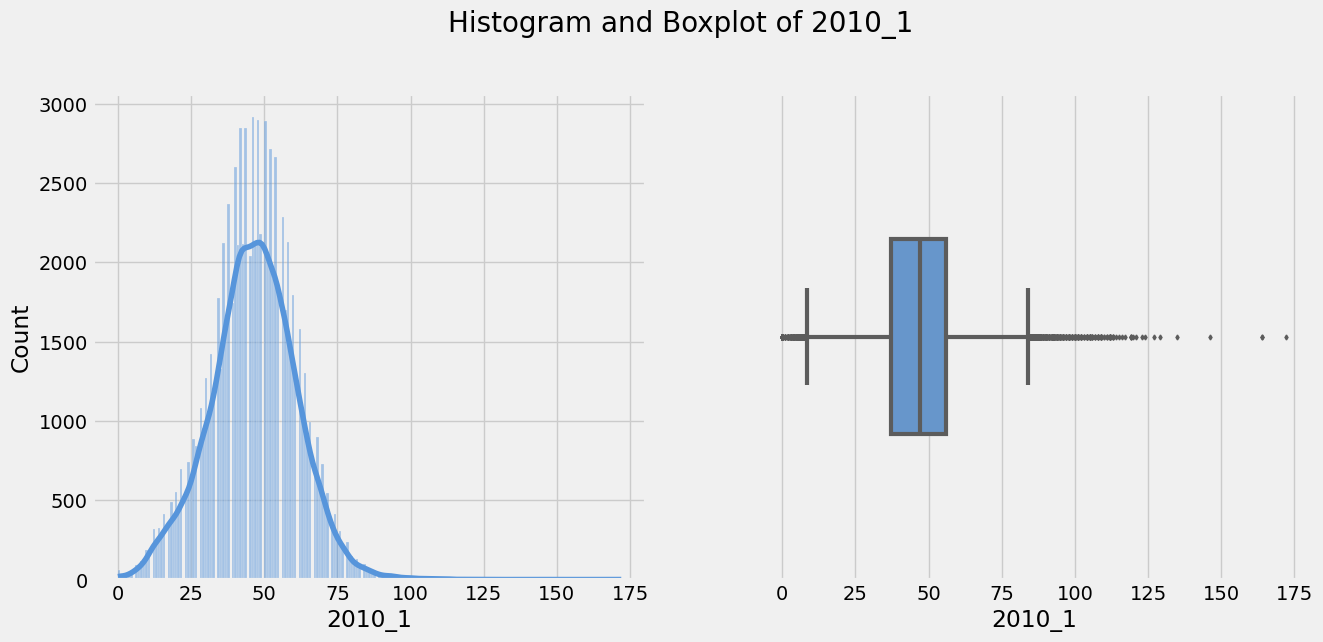

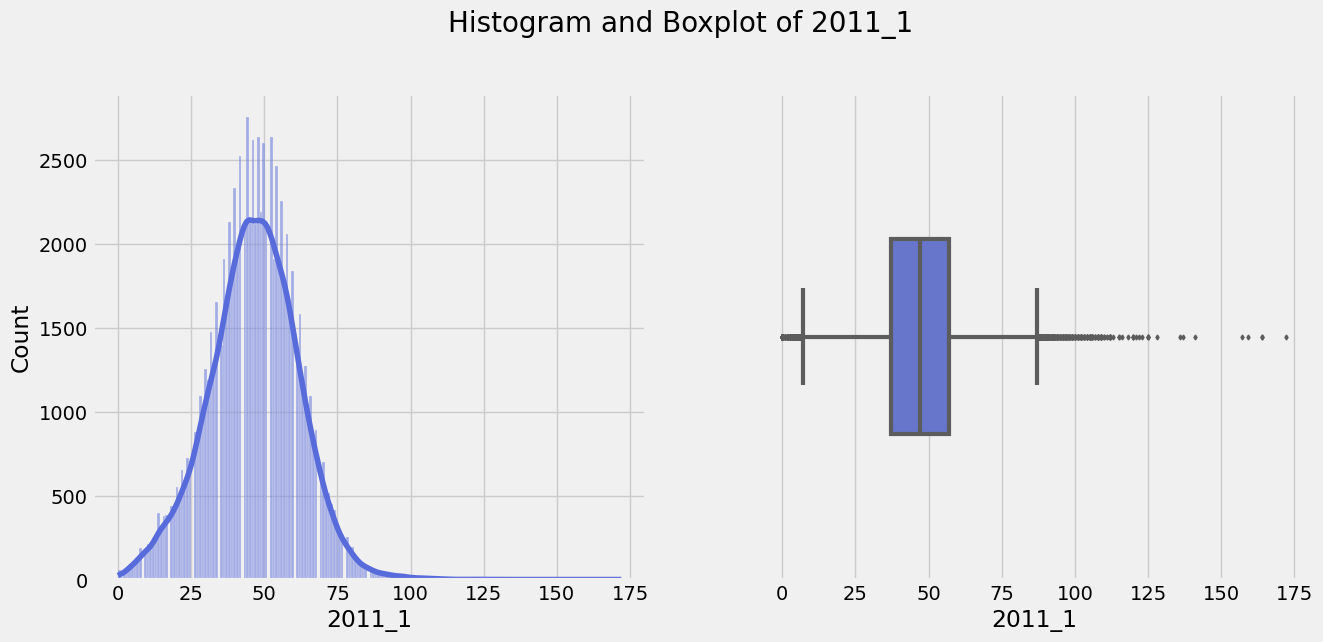

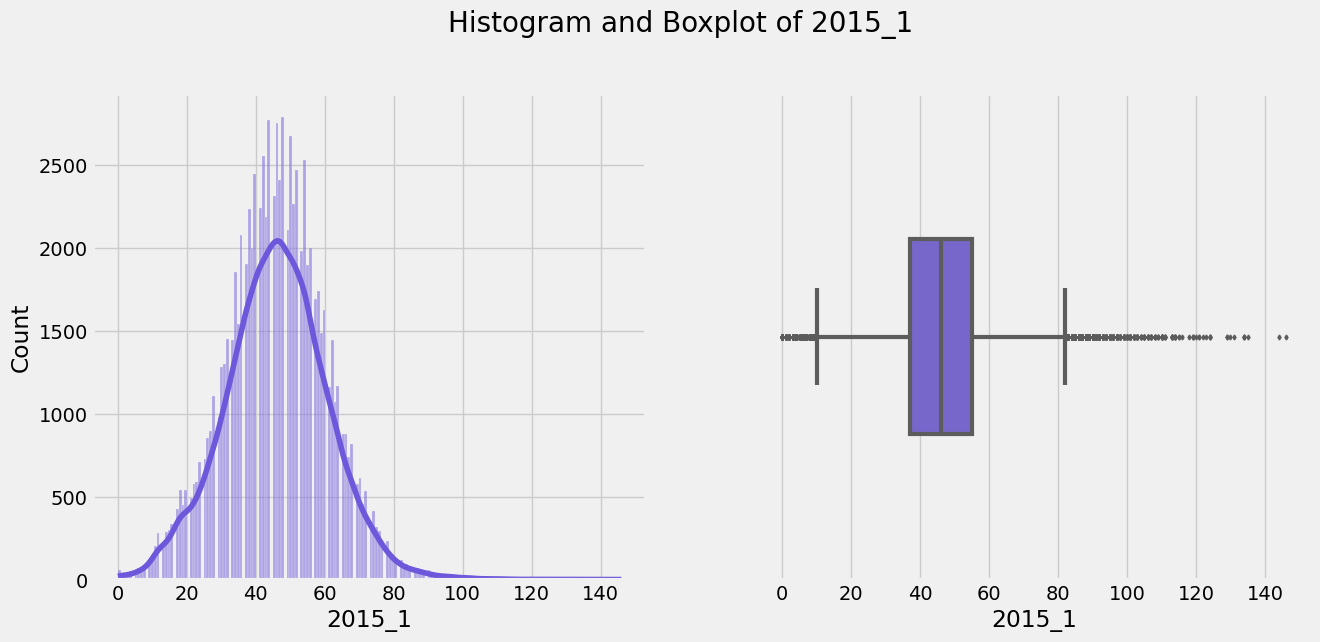

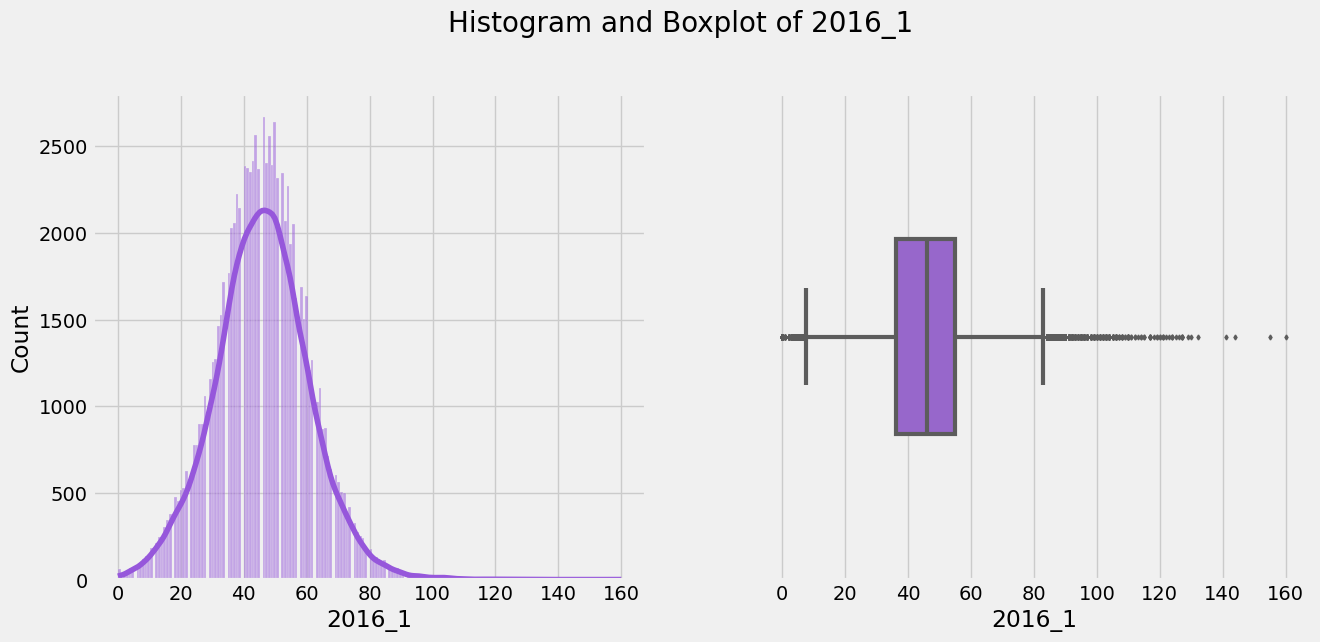

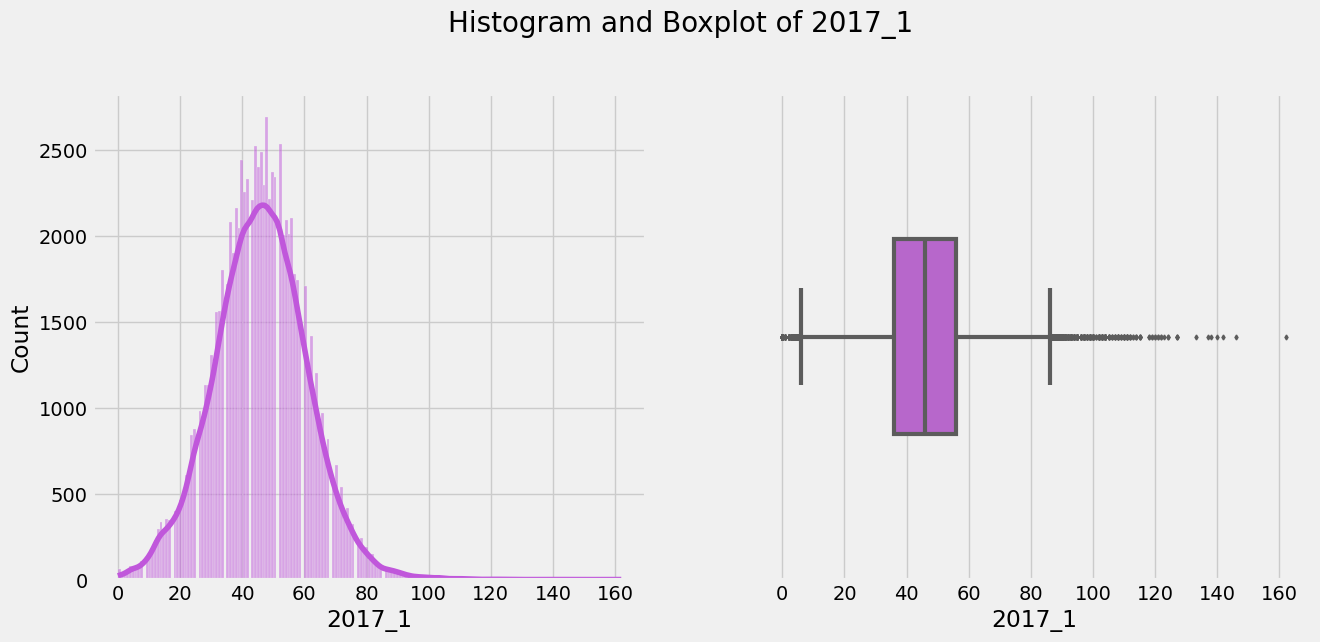

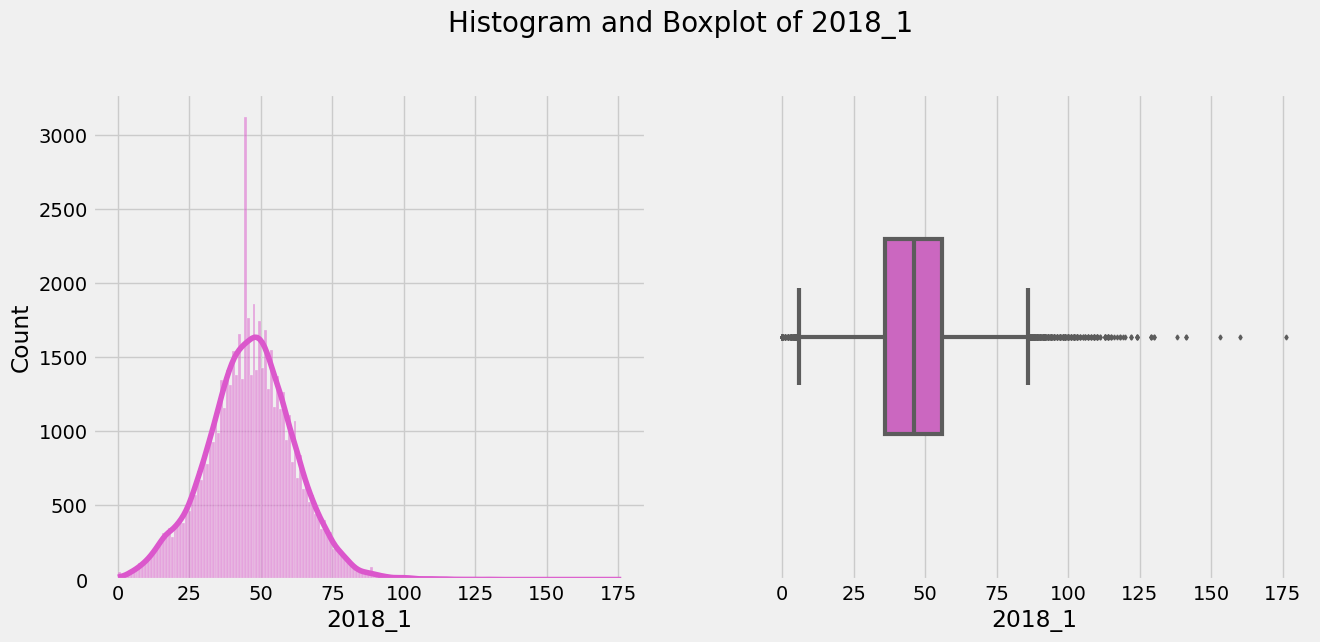

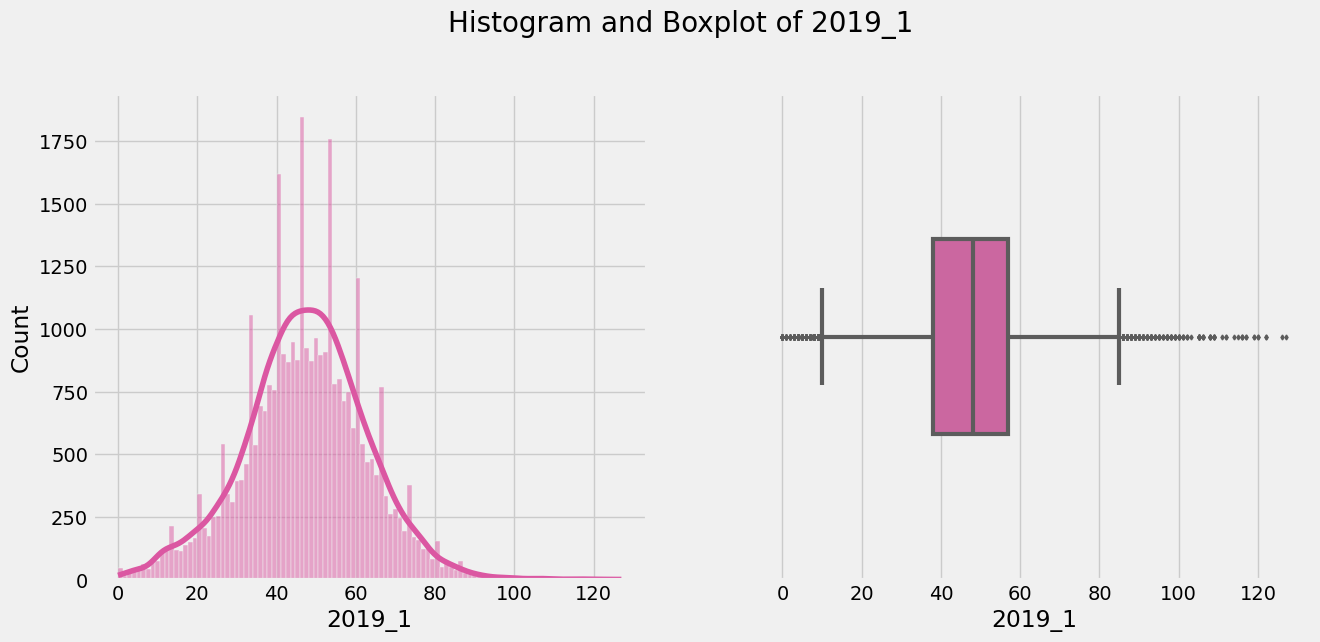

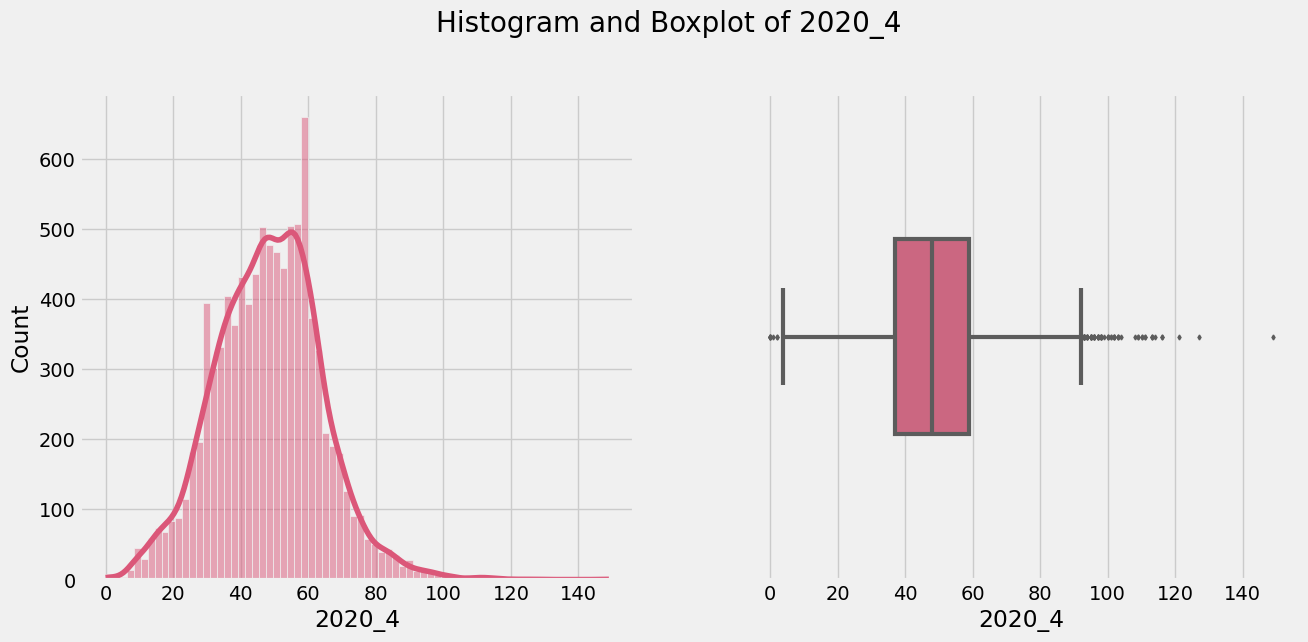

In [11]:
fast_eda(train)

#Acknowledgements:

Matt Op https://www.kaggle.com/code/mattop/nfl-player-contact-detection-eda

Github repo: https://github.com/Matt-OP/fasteda

Shi Long Zhuang https://www.kaggle.com/code/shilongzhuang/intro-to-mice-an-imputation-strategy

Tawej https://www.kaggle.com/tawejssh/covid-19 Graph China/italy

mpwolke https://www.kaggle.com/code/mpwolke/playground-season3-ep-4-biokit-viz